In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# To compare our results with Seon & Kim (2020)

In this notebook we make a radial profile of $P_{\alpha}$ (normalised) in a static homogeneous sphere with a point source  emitting monochromatically from the centre.
Line centre optical depth is$$\tau_0=5.9\times10^6\left(\frac{N_{\mathrm{H}}}{10^{20}\,\mathrm{cm}^{-2}}\right)\left(\frac{T_{\mathrm{k}}}{10^4\,\mathrm{K}}\right)^{-1/2}\,,$$and the mean thermal velocity is$$b=12.9\times10^5\left(\frac{T_{\mathrm{k}}}{10^4\,\mathrm{K}}\right)^{1/2}\,\mathrm{cms^{-1}}\,.$$
I keep the number density fixed at $n_{\mathrm{H}}=2.546\times10^{-4}\,\mathrm{cm}^{-3}$.

For $T=10^4\,\mathrm{K}$ and $\tau_0=10^3$, $L=1.33\times10^{20}\,\mathrm{cm}$ & $b=12.9\times10^5\,\mathrm{cms^{-1}}$ while for $T=10\,\mathrm{K}$ and same line centre OD, $L=4.2\times10^{18}\,\mathrm{cm}$ & $b=4.08\times10^4\,\mathrm{cms^{-1}}$. 
I prepared the domains on `hydro-cool3/output_00015` using the radially expanding version of `RASCAS` and used $10^7$ MC photons.

First we read the text file data (provided by Prof Seon in private communication) and save it as `npy` format. 

In [1]:
import numpy as np

r=[]
p=[]

fil=open('/home/shikhar/work/sk20/data/sphere_v00_t2tau3.txt','r')
c=1
for line in fil:
    line=line.split()
    r.append(line[0])
    p.append(line[1])
    c=c+1

fil.close()

r = np.array([float(i) for i in r])
p = np.array([float(i) for i in p])
np.save('/home/shikhar/work/sk20/x_v00_t2tau3',r)
np.save('/home/shikhar/work/sk20/y_v00_t2tau3',p)

Base level of RAMSES simulation = 8


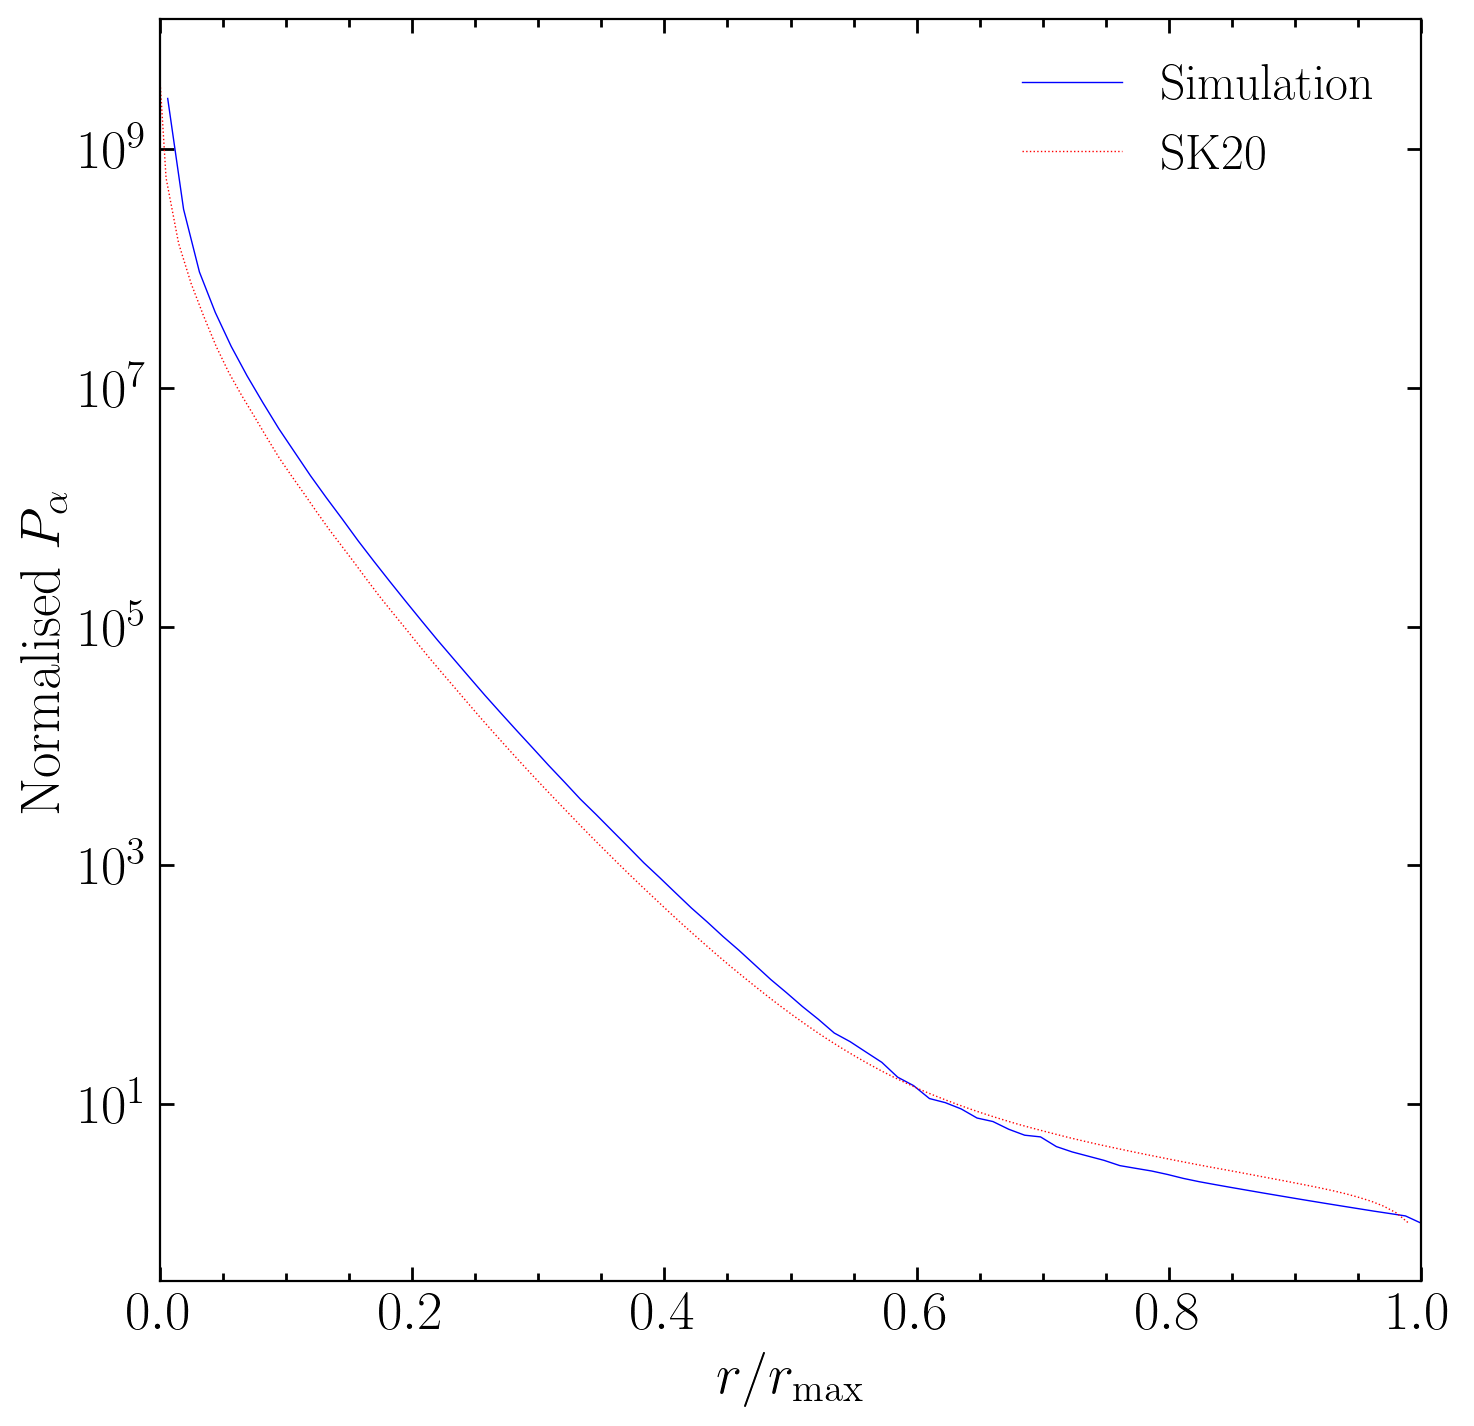

In [4]:
#To read and analyse palpha data generated from RASCAS only for generating the radial profile.

import numpy as np
from scipy.io import FortranFile as ff
import matplotlib.pyplot as plt

#Full path to the raw palpha data generated by RASCAS.
fn='/home/shikhar/work/sk20/pa_v00_t2tau3.dat'
#fn='/home/shikhar/work/sk20/pa_v10_t2tau3.dat'

f = ff(fn)

[lev] = f.read_ints()	#I had set the first level of binary data to be the base level of RAMSES simulation.
raw = f.read_reals('d')	#The second level is the palpha data.
np.nan_to_num(raw,copy=False)	
#Replacing nan with 0's for ease of plotting.

print('Base level of RAMSES simulation =',lev)

palpha=np.reshape(raw,[2**lev,2**lev,2**lev],order='F')
#The "order='F'" signifies the FORTRAN style of saving arrays.


#------------------------------------------------------------------------------------------------------------

cell_size = 2.0**(-lev)
rtilde = 0.499  #The radius of the sphere in code units.
Nbins = 80
binsize = rtilde/Nbins

x=np.linspace(cell_size/2,1-cell_size/2,2**lev)
y=x
z=x
X,Y,Z = np.meshgrid(x,y,z,indexing='ij')
X=X-0.5
Y=Y-0.5
Z=Z-0.5

R=np.sqrt(X**2+Y**2+Z**2)

rbins = np.linspace(0,rtilde,Nbins+1)
r = (rbins[:-1]+rbins[1:])/2
rmax = max(r)

radial_Pa = np.zeros(Nbins)
cnt = np.zeros(Nbins)

for i in range(Nbins):
    loc = np.where((R <rbins[i+1]) & (R >rbins[i]))
    radial_Pa[i] = radial_Pa[i] + np.sum(palpha[loc])
    cnt[i]=cnt[i] + np.size(palpha[loc])

radial_Pa = radial_Pa/cnt
norm_palpha = radial_Pa/radial_Pa[-1]

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#Load the Seon & Kim (2020) data and normalise it.
taubytau0 = np.load('/home/shikhar/work/sk20/x_v10_t2tau3.npy')
pa_sk20 = np.load('/home/shikhar/work/sk20/y_v10_t2tau3.npy')
pa_sk20 = pa_sk20/pa_sk20[-1]

fig,ax=plt.subplots(figsize=(8.3,7.5),dpi=200)
fig.subplots_adjust(left=0.12, bottom=0.07, right=0.88, top=0.97)
ax.semilogy(r/rmax,norm_palpha,color='b',lw=0.5,label='Simulation')
ax.semilogy(taubytau0,pa_sk20,color='r',ls=':', lw=0.5,label='SK20')

ax.set_xlabel(r"$r/r_{\mathrm{max}}$",fontsize=20)
ax.set_ylabel(r"Normalised $P_{\alpha}$",fontsize=20)
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1,direction='in')
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#ax.set_ylim([1,1e10])
ax.set_xlim([0,1])
ax.legend(fontsize=18,frameon=False)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.show()
#plt.savefig('T2tau3_v8.pdf')


In [8]:
np.save('pa_v00_t2tau3',norm_palpha)
#np.save('pa_v10_t2tau3',norm_palpha)

Combining the previous results for final publication ...

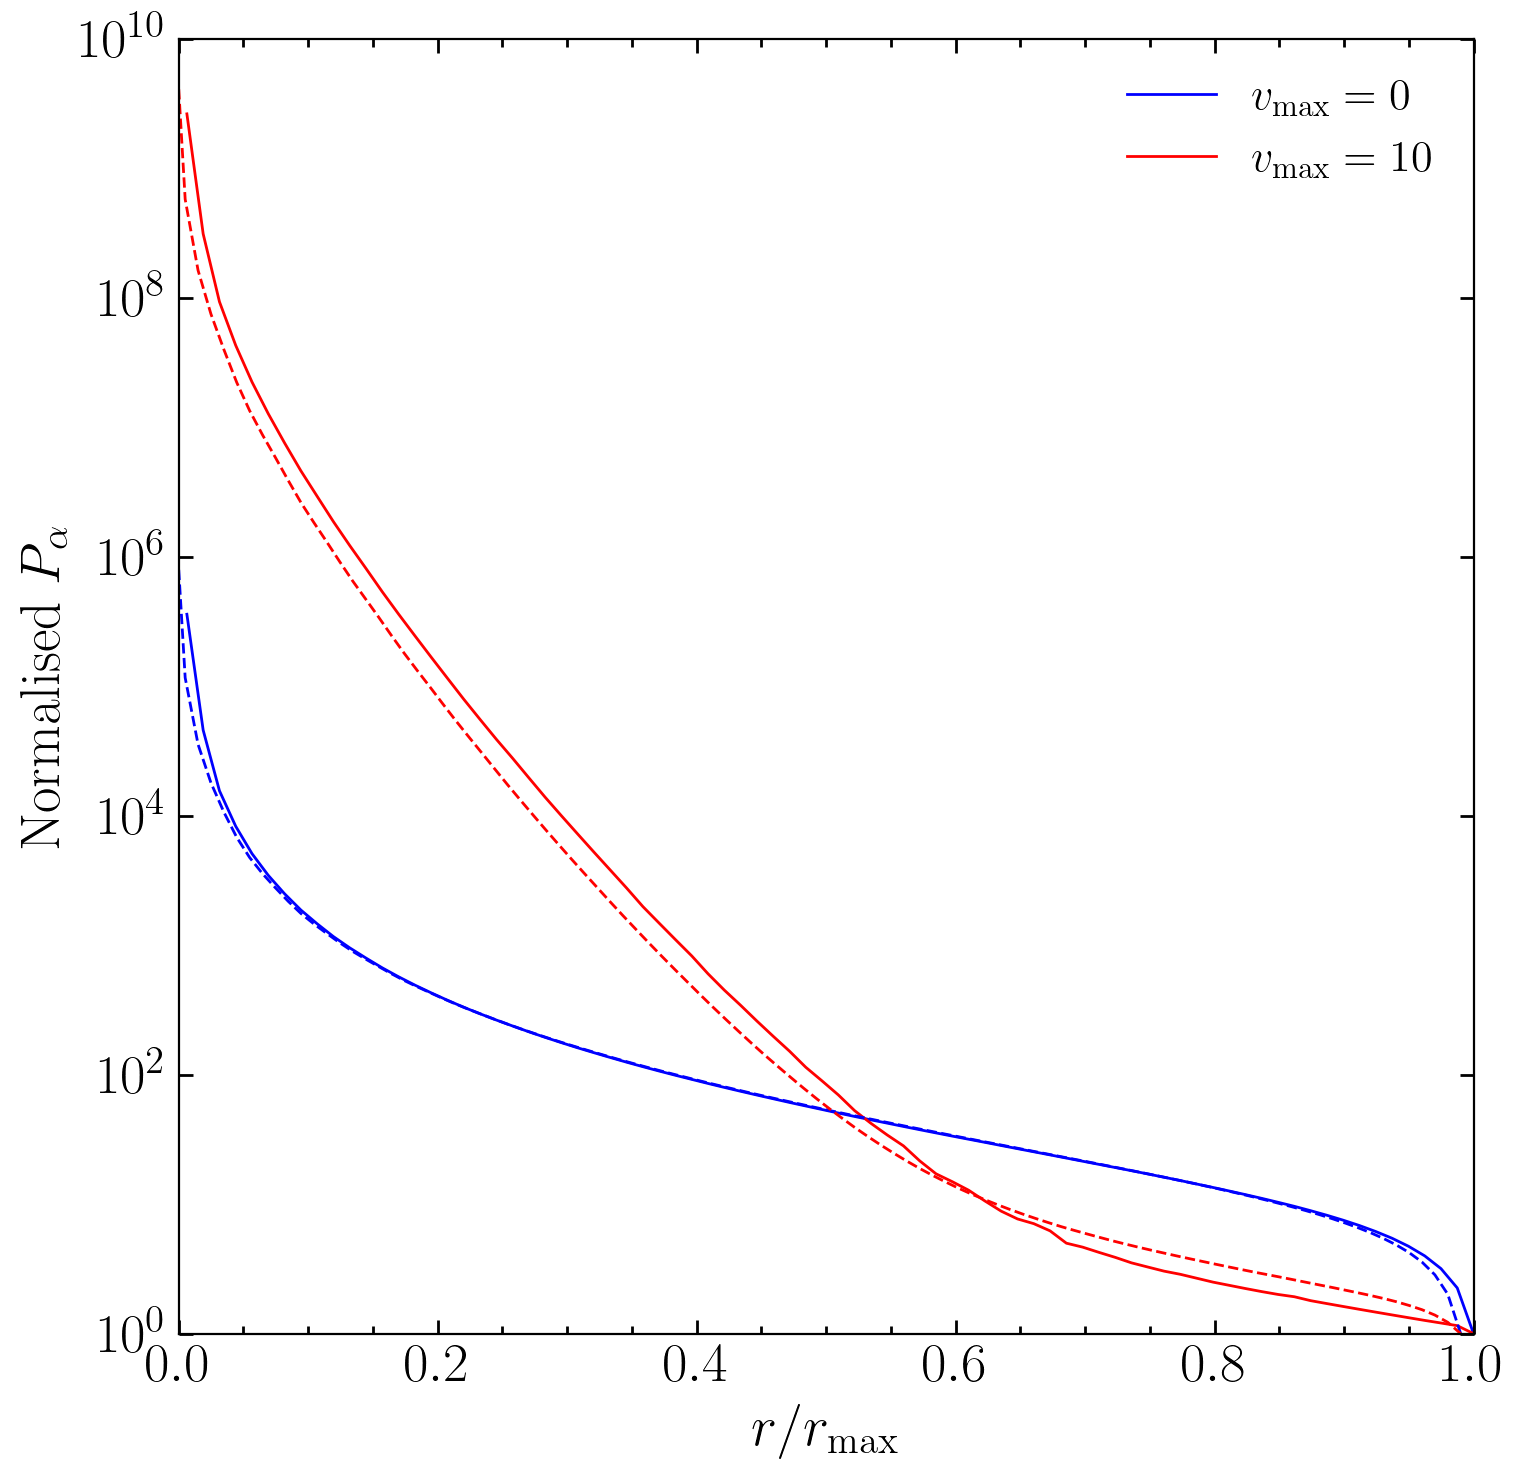

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

print('Loading SK20 data ...')
x_0 = np.load('/home/shikhar/work/sk20/x_v00_t2tau3.npy')
y_0 = np.load('/home/shikhar/work/sk20/y_v00_t2tau3.npy')

x_10 = np.load('/home/shikhar/work/sk20/x_v10_t2tau3.npy')
y_10 = np.load('/home/shikhar/work/sk20/y_v10_t2tau3.npy')

print('Loading my data ...')
pa_v00_t2tau3 = np.load('pa_v00_t2tau3.npy')
pa_v10_t2tau3 = np.load('pa_v10_t2tau3.npy')



rtilde = 0.499

def radii(Nbins):
    rbins = np.linspace(0,rtilde,Nbins+1)
    return (rbins[:-1]+rbins[1:])/2

r80 = radii(80)
rmax = max(r80)


fig,ax=plt.subplots(figsize=(8.3,7.3),dpi=200)
fig.subplots_adjust(left=0.11, bottom=0.06, right=0.89, top=1.0)
ax.semilogy(r80/rmax,pa_v00_t2tau3,color='b',lw=1,label='$v_{\mathrm{max}}=0$')
ax.semilogy(r80/rmax,pa_v10_t2tau3,color='r',lw=1,label='$v_{\mathrm{max}}=10$')
ax.semilogy(x_0,y_0/y_0[-1],color='b',ls='--',lw=1)
ax.semilogy(x_10,y_10/y_10[-1],color='r',ls='--',lw=1)
ax.set_xlabel(r"$r/r_{\mathrm{max}}$",fontsize=20)
ax.set_ylabel(r"Normalised $P_{\alpha}$",fontsize=20)
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1,direction='in')
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_ylim([1,1e10])
ax.set_xlim([0,1])
ax.legend(fontsize=16,frameon=False)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.show()
plt.savefig('SK20.pdf')

